In [1]:
folder = '../data/log/'
files = ! ls $folder
print(files)

['0', '0_exploit', '1', '20220105_2052_exploit', '20220105_2054', '20220105_2054_exploit', '20220106_1553', '20220106_1827', '20220106_2131']


In [2]:
import json

def load_data(file_name):
    file_dir = folder+files[0]
    file_dir = folder+file_name
    print(file_dir)
    
    data = json.load( open(file_dir+"/process.json"))
    print(data.keys())
    return data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['savefig.facecolor']='white'

def plot(data, label='reward', smooth_radius=200, savepath=None, range=10**8):
    def smooth(y, radius=200, mode='two_sided'):
        if len(y) < 2*radius+1:
            return np.ones_like(y) * y.mean()
        elif mode == 'two_sided':
            convkernel = np.ones(2 * radius+1)
            return np.convolve(y, convkernel, mode='same') / \
                   np.convolve(np.ones_like(y), convkernel, mode='same')
        elif mode == 'causal':
            convkernel = np.ones(radius)
            out = np.convolve(y, convkernel,mode='full') / \
                  np.convolve(np.ones_like(y), convkernel, mode='full')
            return out[:-radius+1]

    colors = ['r', 'b', 'c', 'y']
    
    for (k, v), c in zip(data.items(), colors):
#         if label=='RL loss':
        v=v
        plt.plot(smooth(v[:range], radius=smooth_radius), color=c, label=k)
        plt.plot(v[:range], color=c, alpha=0.3)
    plt.legend()
    plt.grid()
    plt.title(label)
    plt.xlabel('episode')
    plt.ylabel(label)
    if savepath is not None:
        plt.savefig(savepath, bbox_inches='tight',)
    
img_path = 'generated_img/'

log/20220105_2054/pettingzoo_boxing_v1_nash_dqn/update_20220105_2054.json
dict_keys(['loss'])


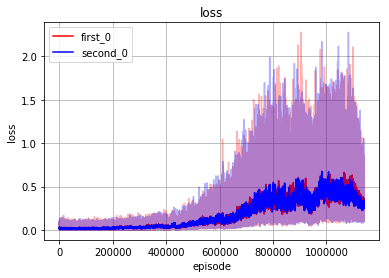

In [13]:
# a first unexploitable agent by sp on boxing
file_name =  '20220105_2054/pettingzoo_boxing_v1_nash_dqn/update_20220105_2054.json'
data = load_data(file_name)
# print(data['loss'].keys())
plot(data['loss'], 'loss', smooth_radius=20, savepath='loss.png')
plt.show()
# plot({'length': data['loss']}, 'episode length', smooth_radius=20, savepath=img_path+file_name+'length')
# plt.show()
# plot(data['loss'], 'RL loss', smooth_radius=10, savepath=img_path+file_name+'loss')